In [1]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_polynomial_parameters(js, npars, nsect):
    # cast 
    nsect = int(nsect)
    npars = int(npars)
    # get sections
    J = []
    for s in range(int(nsect)):
        x0   = js[nsect*npars+s]
        x1   = js[nsect*npars+s+1]
        pars = np.flip(js[s*npars:(s+1)*npars])
        J.append((s, x0, x1, pars))
    return J

In [3]:
fname  = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/CProfiles/cprofiles_fits.root")
# fname  = os.path.expandvars("$LUSTRE/CProfiles/mu-/tuning/cprofiles_fits.root")

f  = uproot.open(fname)
print(f.classnames())

# get info
npars, nsectmax, _, _, _, _ = f["hprofinf"].values()

{'hI3d_par_0;1': 'TH3D', 'hI3d_par_0_chi2;1': 'TH2D', 'hI3d_nsect_0;1': 'TH2D', 'hI3d_par_1;1': 'TH3D', 'hI3d_par_1_chi2;1': 'TH2D', 'hI3d_nsect_1;1': 'TH2D', 'hI3d_par_2;1': 'TH3D', 'hI3d_par_2_chi2;1': 'TH2D', 'hI3d_nsect_2;1': 'TH2D', 'hprofinf;1': 'TH1F', 'gI_iso_1_pars;1': 'TH1D', 'gI_iso_2_pars;1': 'TH1D', 'gNphot;1': 'TGraph', 'gNphot_pars;1': 'TH1D', 'gsthr;1': 'TGraph', 'gsthr_pars;1': 'TH1D', 'I_0;1': 'TH3D', 'I_1;1': 'TH3D', 'I_2;1': 'TH3D', 'hI_iso_1;1': 'TH1D', 'hI_iso_2;1': 'TH1D'}


In [33]:
n = 0

# get integral and parameters histograms
Is, r0bins, th0bins, mbins = f[f"I_{n}"].to_numpy()
js, r0bins, th0bins, jbins = f[f"hI3d_par_{n}"].to_numpy()
nsects, r0bins, th0bins = f[f"hI3d_nsect_{n}"].to_numpy()

log_mbins   = np.log(mbins)
log_momenta = np.log((mbins[1:] + mbins[:-1])/2.)

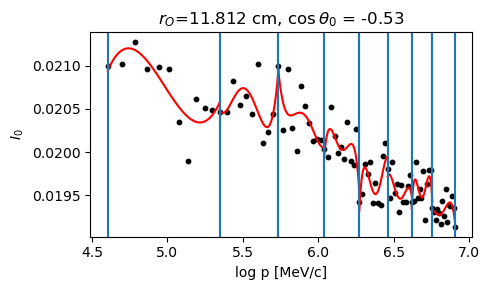

In [69]:
# choose random bin index
r0bin  = np.random.randint(len(r0bins)-1)
th0bin = np.random.randint(len(th0bins)-1)

I = Is[r0bin, th0bin]

# plot
plt.figure(figsize=[5, 3])
plt.title(rf"$r_O$={round(r0bins[r0bin]/10, 3)} cm, $\cos \theta_0$ = {round(th0bins[th0bin], 2)}")

plt.scatter(log_momenta, I, s=10, color="k")

# sections
J = get_polynomial_parameters(js[r0bin, th0bin], npars, nsects[r0bin, th0bin])

for section in J:
    x0 = section[1]
    x1 = section[2]
    pars = section[3]
    pol = np.poly1d(pars)
    px = np.linspace(x0, x1, 100)
    plt.plot(px, pol(px), color="r")
    plt.axvline(x0)
    plt.axvline(x1)

plt.xlabel("log p [MeV/c]")
plt.ylabel(fr"$I_{n}$")
plt.tight_layout()

### Isotropic

In [6]:
n = 1

# get integral and parameters histograms
Is, mbins = f[f"hI_iso_{n}"].to_numpy()
js, jbins = f[f"gI_iso_{n}_pars"].to_numpy()
# nsects, r0bins, th0bins = f[f"hI3d_nsect_{n}"].to_numpy()

log_mbins   = np.log(mbins)
log_momenta = np.log((mbins[1:] + mbins[:-1])/2.)

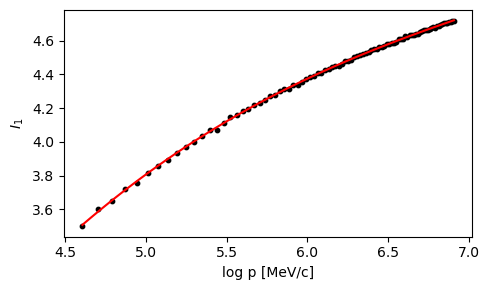

In [7]:
# plot
plt.figure(figsize=[5, 3])
plt.title("")

plt.scatter(log_momenta, np.log(Is), s=10, color="k")

pol = np.poly1d(np.flip(js[:-2]))
px = np.linspace(log_momenta[0], log_momenta[-1], 100)
plt.plot(px, pol(px), color="r")

plt.xlabel("log p [MeV/c]")
plt.ylabel(fr"$I_{n}$")
plt.tight_layout()

### number of photons and s-threshold fits

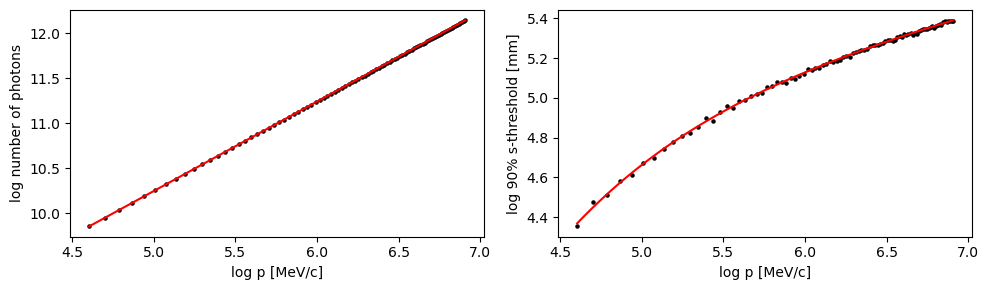

In [31]:
plt.figure(figsize=[10, 3])

# nphotons
plt.subplot(121)
mom, nphotons = f["gNphot"] .values()
plt.scatter(np.log(mom), np.log(nphotons), s=5, c="k")

pars, _ = f["gNphot_pars"].to_numpy()
pol = np.poly1d(np.flip(pars[:-2]))
px = np.linspace(np.log(mom[0]), np.log(mom[-1]), 100)
plt.plot(px, pol(px), color="r")

plt.xlabel("log p [MeV/c]")
plt.ylabel("log number of photons")

#sthreshols
plt.subplot(122)
mom, sthresholds = f["gsthr"]  .values()
plt.scatter(np.log(mom), np.log(sthresholds), s=5, c="k")

pars, _ = f["gsthr_pars"].to_numpy()
pol = np.poly1d(np.flip(pars[:-2]))
px = np.linspace(np.log(mom[0]), np.log(mom[-1]), 100)
plt.plot(px, pol(px), color="r")

plt.xlabel("log p [MeV/c]")
plt.ylabel("log 90% s-threshold [mm]")

plt.tight_layout()